In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from tensorflow.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
# train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
# test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')
# print("Train size:{}\nTest size:{}".format(train.size, test.size))
# print("Train shape:{}\nTest shape:{}".format(train.shape, test.shape))

# x_train = train.drop(['label']).values.astype('float32')
# y_train = train['label'].values.astype('int32')
# x_test = test.drop(['label']).values.astype('float32')
# y_test = test['label'].values.astype('int32')

# x_train = x_train.reshape(x_train.shape[0],28,28)
# x_test = x_test.reshape(x_test.shape[0],28,28)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.05, random_state=42)


print("X_Train shape:{}\nT_Train shape:{}".format(x_train.shape, y_train.shape))
print("X_Val shape:{}\nY_Val shape:{}".format(x_val.shape, y_val.shape))
print("X_Test shape:{}\nY_Test shape:{}".format(x_test.shape, y_test.shape))


X_Train shape:(57000, 28, 28)
T_Train shape:(57000,)
X_Val shape:(3000, 28, 28)
Y_Val shape:(3000,)
X_Test shape:(10000, 28, 28)
Y_Test shape:(10000,)


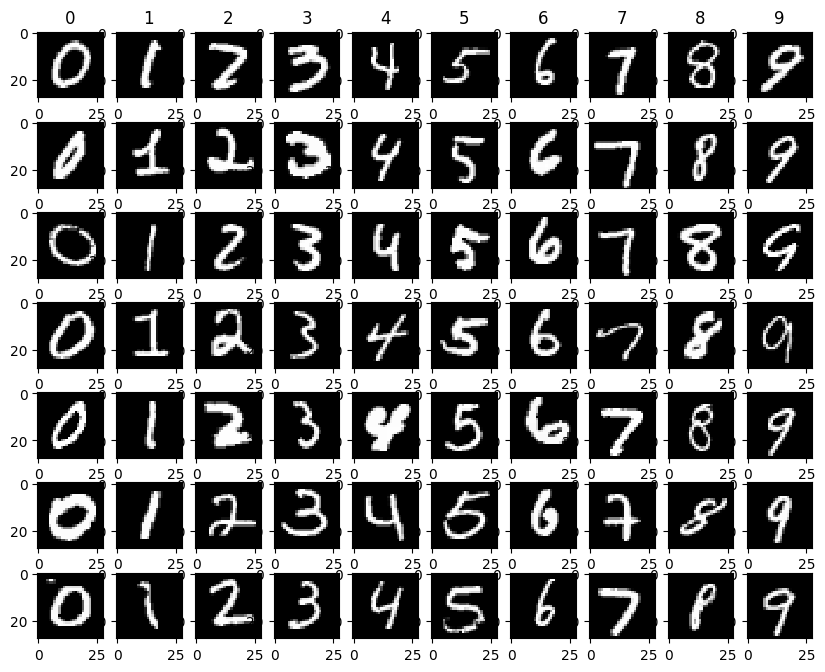

In [6]:
classes = ['0','1','2','3','4','5','6','7','8','9',]
num_class = len(classes)
samples_per_class = 7
plt.figure(0)

for y,cls in enumerate(classes):
  indices = np.flatnonzero(y_train == y)
  indices = np.random.choice(indices, samples_per_class, replace=False)
  for i, index in enumerate(indices):
    plt_index = i*num_class + y +1
    plt.subplot(samples_per_class, num_class, plt_index)
    plt.imshow(x_train[index])
    if i==0:
      plt.title(cls)
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
print("Train size:{}\nvalidation size:{}\nTest size:{}".format(x_train.shape,x_val.shape, x_test.shape))


Train size:(57000, 28, 28, 1)
validation size:(3000, 28, 28, 1)
Test size:(10000, 28, 28, 1)


In [8]:
from tensorflow.keras.layers import Input,Dense,Conv2D,Activation,ReLU, Add, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [9]:
input = Input(shape=[28,28,1])
x = Conv2D(32, (5,5), strides=1, padding='same', name='conv1')(input)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch1')(x)
x = Activation('relu', name='relu1')(x)

x = Conv2D(32, (5,5), strides=1, padding='same', name='conv2')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch2')(x)
x = Activation('relu', name='relu2')(x)

x = Conv2D(32, (5,5), strides=1, padding='same', name='conv2add')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch2add')(x)
x = Activation('relu', name='relu2add')(x)

x = Dropout(0.15)(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

x = Conv2D(64, (3,3), strides=1, padding='same', name='conv3')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch3')(x)
x = Activation('relu', name='relu3')(x)

x = Conv2D(64, (3,3), strides=1, padding='same', name='conv4')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch4')(x)
x = Activation('relu', name='relu4')(x)

x = Conv2D(32, (3,3), strides=1, padding='same', name='conv5')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch5')(x)
x = Activation('relu', name='relu5')(x)

x = Dropout(0.15)(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
x = Dense(100, name='Dense30')(x)
x = Activation('relu',name='relu6')(x)
x = Dropout(0.05)(x)
x = Dense(10, name='Dense10')(x)
x = Activation('softmax')(x)

model = Model(inputs = input, outputs=x)
print(model.summary())



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch1 (BatchNormalization)          │ (None, 28, 28, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu1 (Activation)                   │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 28, 28, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch2 (BatchNormalization)          │ (None, 28, 28, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2 (Activation)                   │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2add (Conv2D)                    │ (None, 28, 28, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch2add (BatchNormalization)       │ (None, 28, 28, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2add (Activation)                │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch3 (BatchNormalization)          │ (None, 14, 14, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu3 (Activation)                   │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch4 (BatchNormalization)          │ (None, 14, 14, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu4 (Activation)                   │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv5 (Conv2D)                       │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch5 (BatchNormalization)          │ (None, 14, 14, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu5 (Activation)                   │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 284,918 (1.09 MB)

 Trainable params: 284,406 (1.08 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [21]:
checkpoint_path = '/content/drive/MyDrive/MNIST/best_weights.keras' # Specify the path in your Drive

# import os
# os.makedirs('/content/drive/MyDrive/MNIST', exist_ok=True)

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
imggen = ImageDataGenerator(
    rotation_range=8,
    zoom_range=0.13,
    width_shift_range=0.13,
    height_shift_range=0.13
)

epochs=60
lr_initial = 0.0011

optimizer = Adam(learning_rate=lr_initial, decay=lr_initial/(epochs*1.3))

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
imggen.fit(x_train)
batch_size=64

history = model.fit(imggen.flow(x_train,y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_val,y_val),
                              verbose=1,
                              steps_per_epoch=x_train.shape[0],
                              callbacks=[checkpoint])
model.load_weights(checkpoint_path)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  889/57000 ━━━━━━━━━━━━━━━━━━━━ 31:22 34ms/step - accuracy: 0.9973 - loss: 0.0094

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57000/57000 ━━━━━━━━━━━━━━━━━━━━ 40s 546us/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9940 - val_loss: 0.0209
Epoch 2/60


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


57000/57000 ━━━━━━━━━━━━━━━━━━━━ 32s 467us/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9947 - val_loss: 0.0217
Epoch 3/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 27s 472us/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9930 - val_loss: 0.0247
Epoch 4/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 39s 440us/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9943 - val_loss: 0.0248
Epoch 5/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 25s 433us/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9937 - val_loss: 0.0245
Epoch 6/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 28s 483us/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 7/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 26s 460us/step - accuracy: 0.9974 - loss: 0.0084 - val_accuracy: 0.9950 - val_loss: 0.0258
Epoch 8/60
57000/57000 ━━━━━━━━━━━━━━━━━━━━ 41s 460us/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9943 - val_loss: 0.0210
Epoch 9/60
  567/57000 ━━━━━━━━━━━━━━━━━━━━ 27:54 30ms/step - accu

KeyboardInterrupt: 

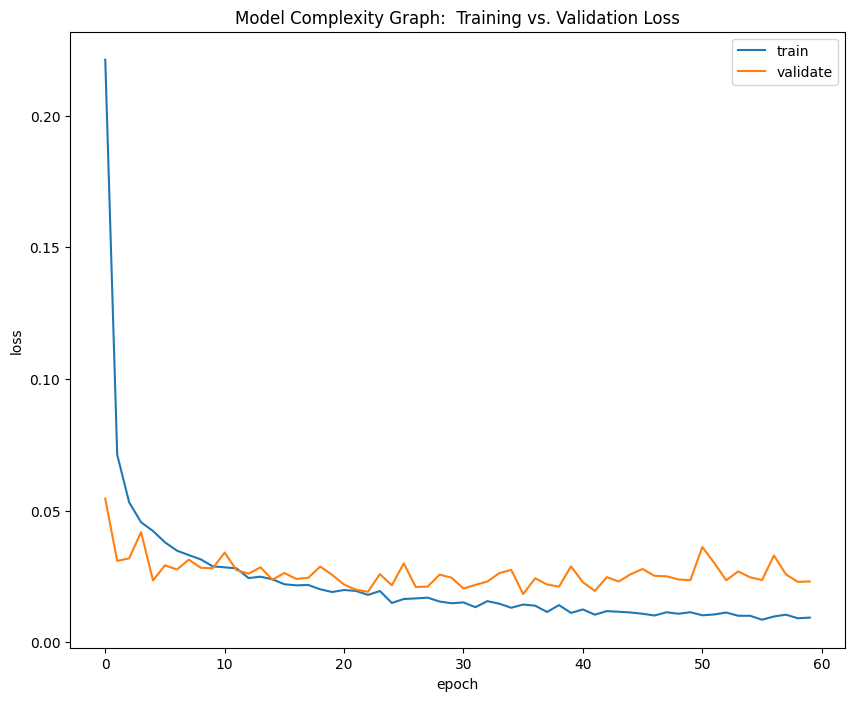

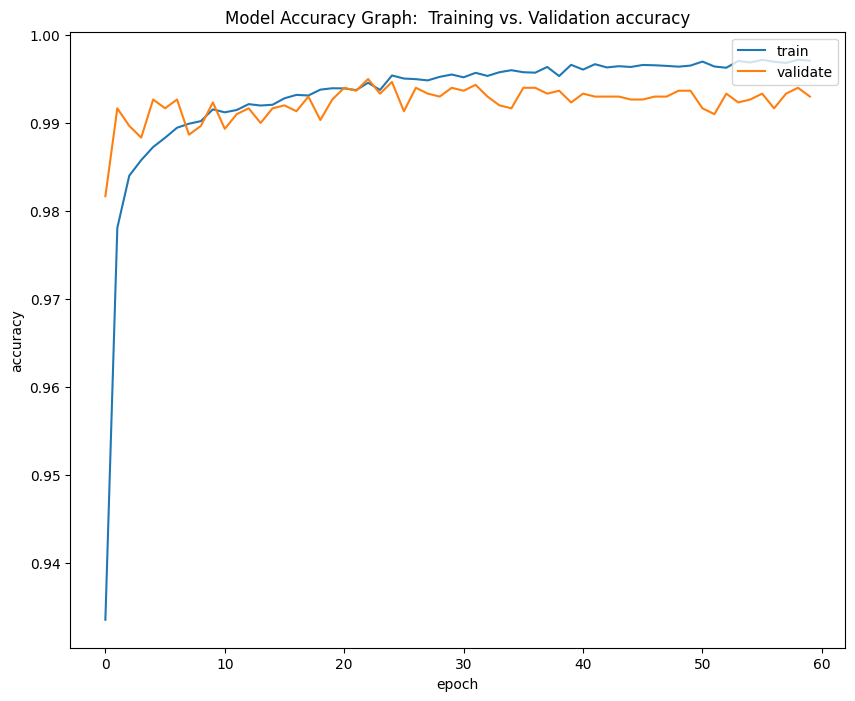

In [16]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Figure size 1000x800 with 0 Axes>

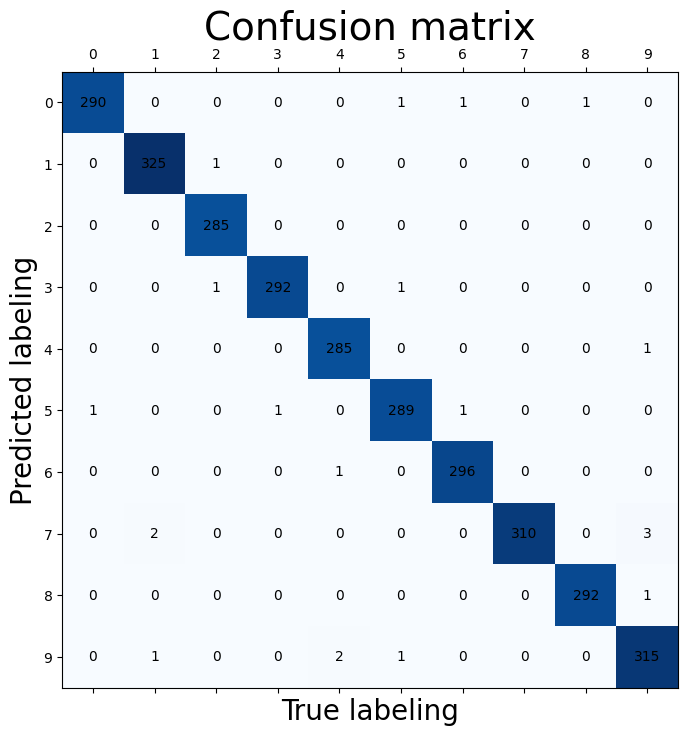

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_vecs = model.predict(x_val)
y_pred = np.argmax(y_vecs,axis=1)
y_true = y_val
cm = confusion_matrix(y_true,y_pred)


plt.figure(11)
fig, ax = plt.subplots()
ax.matshow(cm, cmap=plt.cm.Blues)

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.title('Confusion matrix',size = 28)
plt.xlabel('True labeling',size = 20)
plt.ylabel('Predicted labeling',size = 20)
plt.rcParams.update({'font.size': 22})


In [20]:
model.save('/content/drive/MyDrive/MNIST/Conv_Model_1.keras')